In [4]:
%matplotlib inline

In [2]:
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
from glob import iglob

In [9]:
db_dir = "/data1/kji/databases/dbs_200mill"

In [10]:
def get_counts(d):
    """given a database, returns a dictionary mapping each piece to the number of unique fingerprints it has in IMSLP"""
    counts = defaultdict(int)
    for combination in d:
        db = d[combination]
        for fp in db:
            for piece in db[fp][1]:
                counts[piece] += 1
    return counts

In [11]:
def get_coverage(counts, total_pieces):
    """
    given a dictionary of counts, return an array where a[i] is the percent of 
    items in IMSLP with at least i+1 unique fingerprints
    """
    num_pieces_per_count = defaultdict(int)
    for num in counts.values():
        num_pieces_per_count[num] += 1
    n = max(num_pieces_per_count)
    cumulative_counts = []
    cur_count = 0
    for i in reversed(range(1, n+1)):
        cur_count += num_pieces_per_count[i]
        cumulative_counts.append(cur_count)
    return [count / total_pieces for count in cumulative_counts[::-1]]

In [12]:
d = {}

In [15]:
for filename in iglob(f"{db_dir}/*.pkl", recursive=True):
    combination = filename.split('/')[-1][:-4]
    with open(filename, "rb") as f:
        db = pickle.load(f)
    d[combination] = db

In [18]:
total = 30275

In [19]:
percents = get_coverage(counts, total)

In [35]:
with open("data/percents4.pkl", "wb") as f:
    pickle.dump(percents4, f)

In [33]:
sns.set(style='whitegrid')

In [36]:
with open("data/percent_split1.pkl", 'rb') as f:
    percents1 = pickle.load(f)

In [37]:
with open("data/percent_split2.pkl", 'rb') as f:
    percents2 = pickle.load(f)

In [38]:
with open("data/percent_split21.pkl", 'rb') as f:
    percents3 = pickle.load(f)

In [42]:
with open("data/percents4.pkl", 'rb') as f:
    percents4 = pickle.load(f)

In [43]:
with open("data/percent_merged_23_grams.pkl", 'rb') as f:
    percents5 = pickle.load(f)

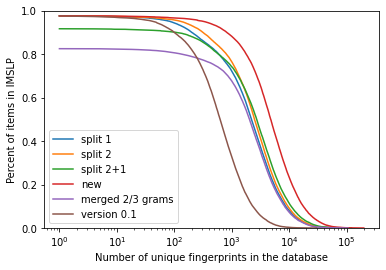

In [52]:
plt.plot(range(1, len(percents1) + 1), percents1, label="split 1")
plt.plot(range(1, len(percents2) + 1), percents2, label="split 2")
plt.plot(range(1, len(percents3) + 1), percents3, label="split 2+1")
plt.plot(range(1, len(percents4) + 1), percents4, label="new")
plt.plot(range(1, len(percents5) + 1), percents5, label="merged 2/3 grams")
plt.plot(range(1, len(percents) + 1), percents, label="version 0.1")
plt.xscale("log")
plt.xlabel("Number of unique fingerprints in the database")
plt.ylabel("Percent of items in IMSLP")
plt.ylim((0, 1))
plt.legend()

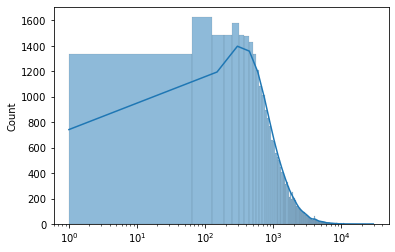

In [50]:
ax = sns.histplot(list(counts.values()), kde=True)
ax.set_xscale("log")